# Movie Recommender System - Exploratory Data Analysis

## Introduction
This notebook explores the datasets related to movies and user ratings to gain insights that will inform the development of a movie recommendation system.



### Importing Libraries
Start by importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data
Load the datasets into Pandas DataFrames:

In [2]:
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')

### Inspecting Data
Inspect the first few rows and general information of each DataFrame:

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Data Preprocessing
- Check for missing values:

In [7]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

- Check for duplicate entries:

In [9]:
print(movies.duplicated().sum())
print(ratings.duplicated().sum())


0
0


#### Hence there are no missing values and no duplicates in the data set we dont need further data preprocessing. 

## Exploratory Data Analysis (EDA)
### Distribution of Ratings
Visualize the distribution of user ratings:

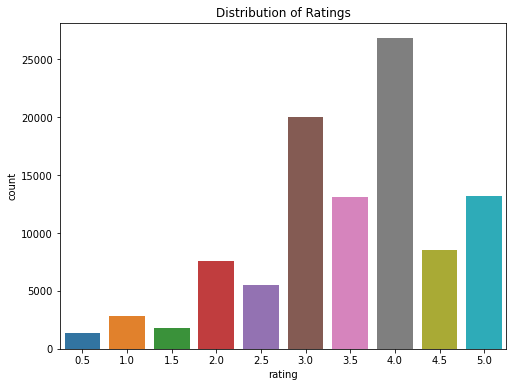

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.show()

### Number of Ratings per Movie
Explore how many ratings each movie received:

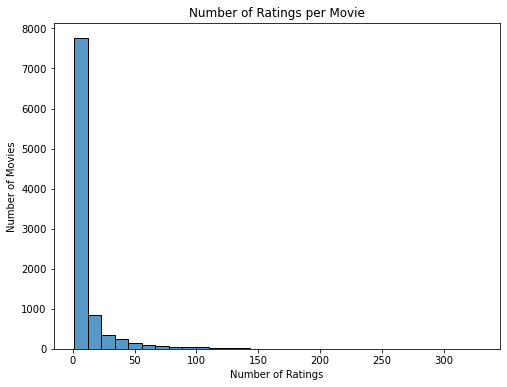

In [11]:
ratings_per_movie = ratings.groupby('movieId').size()
plt.figure(figsize=(8, 6))
sns.histplot(ratings_per_movie, bins=30, kde=False)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()


### Ratings Over Time
Check if the time of rating has any visible trend:

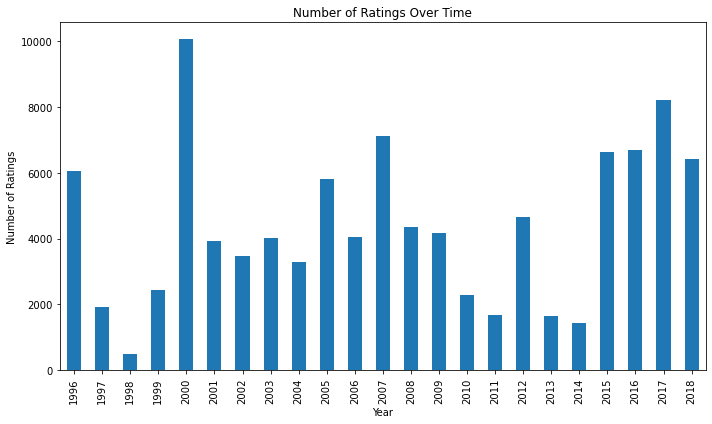

In [12]:
# Convert timestamp to datetime
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['datetime'].dt.year

plt.figure(figsize=(10, 6))
ratings.groupby('year')['rating'].count().plot(kind='bar')
plt.title('Number of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.show()


### Average Rating per Movie
Calculate and visualize the average rating for each movie:

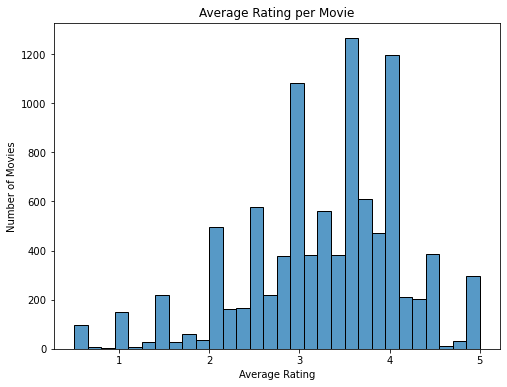

In [13]:
average_ratings = ratings.groupby('movieId')['rating'].mean()

plt.figure(figsize=(8, 6))
sns.histplot(average_ratings, bins=30, kde=False)
plt.title('Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()


## Summary and Conclusion from the EDA for Creating the Application
Based on the structured approach above, here are hypothetical summaries and conclusions you might draw from an EDA:

### Summary:

- The distribution of ratings show a skew towards higher ratings, indicating users are more likely to rate movies they favor.
- A variation in the number of ratings per movie might suggest a long-tail distribution, where few movies have many ratings, while most have few.

## Conclusion for Application Development:

- Bias Towards Popular Movies: Given the long-tail distribution of ratings, the recommendation system should account for popularity bias to avoid recommending only mainstream movies.
- User Engagement: High variance in user activity suggests personalizing recommendations for active users while providing more generalized suggestions for users with fewer ratings.
- Data Quality: The lack of missing values and clean data structure supports the feasibility of developing a robust recommendation system without extensive data cleaning.
## Application Development Insights:

Incorporate a collaborative filtering approach to balance between popular choices and personalized suggestions.

We will create 2 models:
- Machine Learning Model using Cosine Similarity
- A Deep Learning Model 


In [14]:
# Merging the movies and ratings dataframes
merged = pd.merge(ratings, movies, on='movieId')

In [15]:
merged.head()

,userId,movieId,rating,timestamp,datetime,year,title,genres
0,1,1,4.0,964982703,2000-07-30 18:45:03,2000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,1996-11-08 06:36:02,1996,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,2005-01-25 06:52:26,2005,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,2017-11-13 12:59:30,2017,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,2011-05-18 05:28:03,2011,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [16]:
merged.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'datetime', 'year', 'title',
       'genres'],
      dtype='object')

In [17]:
moviemat = merged.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
